/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5419 - loss: 0.6843 - val_accuracy: 0.8303 - val_loss: 0.4127
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8625 - loss: 0.3299 - val_accuracy: 0.9162 - val_loss: 0.2195
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9189 - loss: 0.2082 - val_accuracy: 0.9202 - val_loss: 0.1850
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9253 - loss: 0.1867 - val_accuracy: 0.9141 - val_loss: 0.2124
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9309 - loss: 0.1717 - val_accuracy: 0.9264 - val_loss: 0.1631
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9349 - loss: 0.1613 - val_accuracy: 0.9141 - val_loss: 0.1670
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9440 - loss: 0.1448 - val_accuracy: 0.9284 - val_loss: 0.1549
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9437 - loss: 0.1391 - val_accuracy: 0.

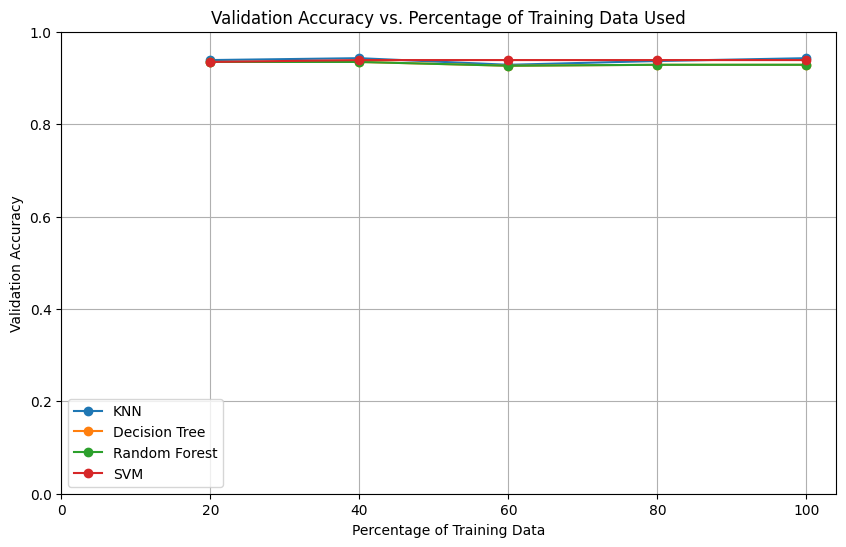

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load datasets
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
valid_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
test_emoticon_df = pd.read_csv("datasets/test/test_emoticon.csv")  # Load test data

# Prepare data
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()
test_emoticon_X = test_emoticon_df['input_emoticon'].tolist()  # Prepare test input

# Encode labels
le = LabelEncoder()
train_emoticon_Y_encoded = le.fit_transform(train_emoticon_Y)
valid_emoticon_Y_encoded = le.transform(valid_emoticon_Y)

# Tokenization and Padding
tokenizer = Tokenizer(char_level=True)  # Character-level tokenization
tokenizer.fit_on_texts(train_emoticon_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_emoticon_X)
valid_sequences = tokenizer.texts_to_sequences(valid_emoticon_X)
test_sequences = tokenizer.texts_to_sequences(test_emoticon_X)  # Convert test text to sequences

# Pad sequences to ensure uniform length
max_length = max(len(seq) for seq in train_sequences)  # Use the longest sequence length
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')  # Pad test sequences

# Build Neural Network Model for Feature Extraction
embedding_dim = 8  # Dimension for embedding layer
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(16, return_sequences=False))  # LSTM layer for sequence processing
model.add(Dense(8, activation='relu'))  # Dense layer for feature representation
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model to see the total parameters
model.summary()

# Train the neural network for feature extraction
model.fit(train_padded, train_emoticon_Y_encoded, epochs=10, batch_size=32, validation_data=(valid_padded, valid_emoticon_Y_encoded))

# Extract features
train_features = model.predict(train_padded)
valid_features = model.predict(valid_padded)
test_features = model.predict(test_padded)  # Extract features from the test data

# Count the total number of parameters
total_params = model.count_params()
print(f"Total number of trainable parameters: {total_params}")

# Define the classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear')
}

# Function to train and evaluate classifiers
def train_and_evaluate(classifier, X_train, Y_train, X_val, Y_val, percentages):
    accuracies = []
    for p in percentages:
        if p < 1.0:
            # Split the dataset based on percentage
            X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=p, random_state=42)
        else:
            X_train_subset = X_train
            Y_train_subset = Y_train

        # Train the classifier
        classifier.fit(X_train_subset, Y_train_subset)

        # Predict and calculate accuracy
        Y_pred = classifier.predict(X_val)
        accuracy = accuracy_score(Y_val, Y_pred)
        accuracies.append(accuracy)

        print(f"Training with {int(p * 100)}% of the data, Validation Accuracy: {accuracy:.4f}")

    return accuracies

# Training and evaluating classifiers
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
results = {}

# Evaluate each classifier
best_model = None
best_accuracy = 0

for model_name, classifier in classifiers.items():
    print(f"Training model: {model_name}")
    accuracies = train_and_evaluate(classifier, train_features, train_emoticon_Y_encoded,
                                    valid_features, valid_emoticon_Y_encoded, percentages)
    results[model_name] = accuracies

    # Determine the best model based on validation accuracy
    final_accuracy = accuracies[-1]
    if final_accuracy > best_accuracy:
        best_accuracy = final_accuracy
        best_model = model_name

# Display the best model and its validation accuracy
print(f"Best Model: {best_model} with Validation Accuracy: {best_accuracy:.4f}")

# Make predictions on the test data using the best classifier
best_classifier = classifiers[best_model]
test_predictions = best_classifier.predict(test_features)  # Use the features extracted from the LSTM for test data

# Convert predictions to binary values (0 or 1)
binary_predictions = (test_predictions > 0.5).astype(int)

# Create the output DataFrame with binary predictions
output_df = pd.DataFrame({
    'predicted_label': binary_predictions
})

# Save predictions to a text file with no header and only one column of binary values
output_df.to_csv("pred_emoticon.txt", sep='\t', index=False, header=False)

# Plotting accuracy vs. percentage of training data used
plt.figure(figsize=(10, 6))
for model_name, accuracies in results.items():
    plt.plot([p * 100 for p in percentages], accuracies, label=model_name, marker='o')

plt.title("Validation Accuracy vs. Percentage of Training Data Used")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)  # Set y-axis to range from 0 to 1 for better visibility
plt.xticks(np.arange(0, 101, 20))  # X-axis ticks
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

# Learning with Prototype function
def learning_with_prototype(X_train, y_train, X_test):
    unique_labels = np.unique(y_train)
    class_prototypes = [np.mean(X_train[y_train == label], axis=0) for label in unique_labels]
    predicted_labels = [unique_labels[np.argmin(np.linalg.norm(sample - class_prototypes, axis=1))] for sample in X_test]
    return np.array(predicted_labels)

# Preprocess with LSTM (No training, just feature extraction)
def lstm_preprocess(X_train, X_test, lstm_units=64):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])))
    X_train_lstm = model.predict(X_train)
    X_test_lstm = model.predict(X_test)
    return X_train_lstm, X_test_lstm

# Load the data
data_train = np.load(r"datasets/train/train_feature.npz")
feat_train = data_train['features']
label_train = data_train['label']
data_valid = np.load(r"datasets/valid/valid_feature.npz")
feat_valid = data_valid['features']
label_valid = data_valid['label']

X_train = feat_train
y_train = label_train
X_val = feat_valid
y_val = label_valid

# Calculate average features for the simple model
avg_train = np.mean(feat_train, axis=1)
avg_valid = np.mean(feat_valid, axis=1)

X_train_avg = avg_train
X_val_avg = avg_valid

# LSTM preprocessing
X_train_lstm, X_val_lstm = lstm_preprocess(X_train, X_val)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Percentages of training examples
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

# Dictionaries to store performance
model_performance_avg = {name: [] for name in models.keys()}
model_performance_lstm = {name: [] for name in models.keys()}
model_performance_avg['LwP'] = []
model_performance_lstm['LwP'] = []

# Highest accuracies for both sets
highest_accuracy_avg = {name: 0 for name in models.keys()}
highest_accuracy_lstm = {name: 0 for name in models.keys()}
highest_accuracy_avg['LwP'] = 0
highest_accuracy_lstm['LwP'] = 0

# Training without LSTM (using averaged features)
for perc in percentages:
    n_train_examples = int(perc * len(X_train_avg))
    X_train_subset_avg = X_train_avg[:n_train_examples]
    y_train_subset = y_train[:n_train_examples]

    # Learning with Prototype (LwP)
    y_val_pred_avg = learning_with_prototype(X_train_subset_avg, y_train_subset, X_val_avg)
    val_accuracy_avg = accuracy_score(y_val, y_val_pred_avg)
    model_performance_avg['LwP'].append(val_accuracy_avg)
    if val_accuracy_avg > highest_accuracy_avg['LwP']:
        highest_accuracy_avg['LwP'] = val_accuracy_avg

# Training with LSTM preprocessing
for perc in percentages:
    n_train_examples = int(perc * len(X_train_lstm))
    X_train_subset_lstm = X_train_lstm[:n_train_examples]
    y_train_subset = y_train[:n_train_examples]  # Ensure this is sliced properly

    # Learning with Prototype (LwP)
    y_val_pred_lstm = learning_with_prototype(X_train_subset_lstm, y_train_subset, X_val_lstm)

    # Calculate validation accuracy
    val_accuracy_lstm = accuracy_score(y_val, y_val_pred_lstm)
    model_performance_lstm['LwP'].append(val_accuracy_lstm)

    # Update highest accuracy for LwP
    if val_accuracy_lstm > highest_accuracy_lstm['LwP']:
        highest_accuracy_lstm['LwP'] = val_accuracy_lstm

# Loop for all other models (for both averaged and LSTM-preprocessed features)
for model_name, model in models.items():
    for perc in percentages:
        n_train_examples = int(perc * len(X_train_avg))
        X_train_subset_avg = X_train_avg[:n_train_examples]
        X_train_subset_lstm = X_train_lstm[:n_train_examples]
        y_train_subset = y_train[:n_train_examples]

        # Train on averaged features
        model.fit(X_train_subset_avg, y_train_subset)
        y_val_pred_avg = model.predict(X_val_avg)
        val_accuracy_avg = accuracy_score(y_val, y_val_pred_avg)
        model_performance_avg[model_name].append(val_accuracy_avg)
        if val_accuracy_avg > highest_accuracy_avg[model_name]:
            highest_accuracy_avg[model_name] = val_accuracy_avg

        # Train on LSTM-preprocessed features
        model.fit(X_train_subset_lstm, y_train_subset)
        y_val_pred_lstm = model.predict(X_val_lstm)
        val_accuracy_lstm = accuracy_score(y_val, y_val_pred_lstm)
        model_performance_lstm[model_name].append(val_accuracy_lstm)
        if val_accuracy_lstm > highest_accuracy_lstm[model_name]:
            highest_accuracy_lstm[model_name] = val_accuracy_lstm

# Plotting both models' accuracies in the same graph
plt.figure(figsize=(12, 8))

for model_name, accuracies_avg in model_performance_avg.items():
    plt.plot([int(perc * 100) for perc in percentages], accuracies_avg, marker='o', label=f"{model_name} (Avg)")

for model_name, accuracies_lstm in model_performance_lstm.items():
    plt.plot([int(perc * 100) for perc in percentages], accuracies_lstm, marker='x', label=f"{model_name} (LSTM)")

plt.title('Validation Accuracy vs. Percentage of Training Examples (Avg vs. LSTM)')
plt.xlabel('Percentage of Training Examples')
plt.ylabel('Validation Accuracy')
plt.xticks([20, 40, 60, 80, 100])
plt.legend()
plt.grid(True)
plt.show()

# Print the highest validation accuracy for each model
print("Highest Validation Accuracy for Each Model (Averaged Features):")
for model_name, accuracy in highest_accuracy_avg.items():
    print(f"{model_name}: {accuracy:.4f}")

print("\nHighest Validation Accuracy for Each Model (LSTM Preprocessing):")
for model_name, accuracy in highest_accuracy_lstm.items():
    print(f"{model_name}: {accuracy:.4f}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 



Logistic Regression Accuracies:
20% training data: 62.99% accuracy
40% training data: 66.46% accuracy
60% training data: 65.64% accuracy
80% training data: 66.67% accuracy
100% training data: 64.83% accuracy

Random Forest Accuracies:
20% training data: 54.81% accuracy
40% training data: 59.30% accuracy
60% training data: 64.21% accuracy
80% training data: 63.80% accuracy
100% training data: 61.96% accuracy

Decision Tree Accuracies:
20% training data: 55.21% accuracy
40% training data: 55.83% accuracy
60% training data: 56.85% accuracy
80% training data: 56.44% accuracy
100% training data: 56.44% accuracy

K-Nearest Neighbors Accuracies:
20% training data: 54.60% accuracy
40% training data: 58.49% accuracy
60% training data: 56.03% accuracy
80% training data: 55.42% accuracy
100% training data: 54.60% accuracy

SVM Accuracies:
20% training data: 61.55% accuracy
40% training data: 64.42% accuracy
60% training data: 67.69% accuracy
80% training data: 65.85% accuracy
100% training data:

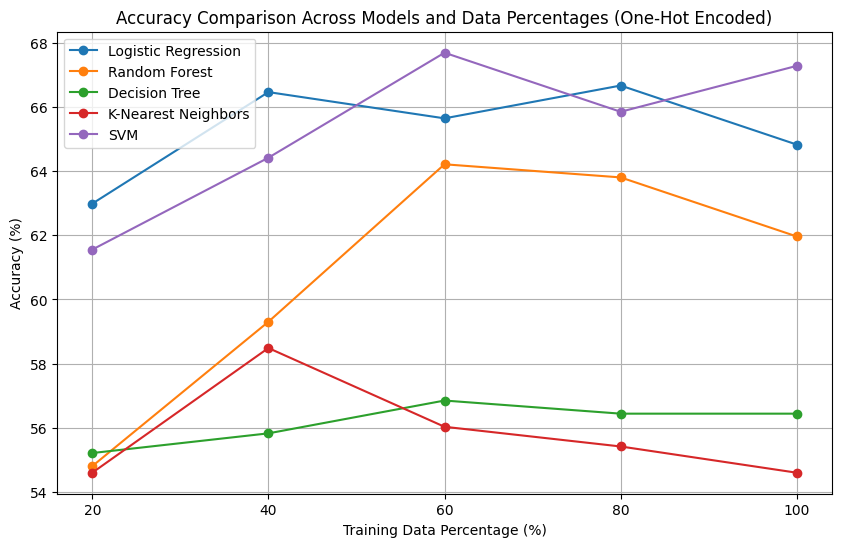

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading training and validation data
train_data = pd.read_csv("datasets/train/train_text_seq.csv")
validate_data = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Preparing training and validation datasets
X_train = train_data['input_str'].values
Y_train = train_data['label'].values
X_validate = validate_data['input_str'].values
Y_validate = validate_data['label'].values

# Cleaning and converting string data to integers
X_train_cleaned = train_data['input_str'].str.extractall('(\d)').unstack().astype(int).values.tolist()
X_validate_cleaned = validate_data['input_str'].str.extractall('(\d)').unstack().astype(int).values.tolist()

# Padding sequences to ensure uniform input size
max_length = max(max(len(seq) for seq in X_train_cleaned), max(len(seq) for seq in X_validate_cleaned))
X_train_padded = pad_sequences(X_train_cleaned, maxlen=max_length, padding='post')
X_validate_padded = pad_sequences(X_validate_cleaned, maxlen=max_length, padding='post')

# Applying OneHotEncoder to convert padded sequences to one-hot encoded format
encoder = OneHotEncoder(categories='auto', handle_unknown='ignore')
X_train_onehot = encoder.fit_transform(X_train_padded).toarray()
X_validate_onehot = encoder.transform(X_validate_padded).toarray()

# Defining models to train and compare
models = {
    "Logistic Regression": LogisticRegression(C=1/0.01, solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(C=1/0.01)
}

# Defining percentages of training data used for evaluation
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracies = {model_name: [] for model_name in models.keys()}

# The training and evaluation process
for p in percentages:
    num_samples = int(len(X_train_onehot) * p)
    X_sample = X_train_onehot[:num_samples]
    Y_sample = Y_train[:num_samples]
    for model_name, model in models.items():
        # Fit the model on the sampled training data
        model.fit(X_sample, Y_sample)
        # Predict on the validation data
        Y_pred = model.predict(X_validate_onehot)
        # Calculate accuracy
        acc = accuracy_score(Y_validate, Y_pred)
        accuracies[model_name].append(acc * 100)

# Display accuracy results for each model and training percentage
for model_name, acc_list in accuracies.items():
    print(f"\n{model_name} Accuracies:")
    for p, acc in zip(percentages, acc_list):
        print(f"{int(p * 100)}% training data: {acc:.2f}% accuracy")

# Plotting the accuracy results
plt.figure(figsize=(10, 6))
for model_name, acc_list in accuracies.items():
    plt.plot([int(p * 100) for p in percentages], acc_list, marker='o', label=model_name)

plt.title('Accuracy Comparison Across Models and Data Percentages (One-Hot Encoded)')
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('Accuracy (%)')
plt.xticks([20, 40, 60, 80, 100])
plt.legend()
plt.grid(True)
plt.show()

# Loading test data for final evaluation
test_data = pd.read_csv("datasets/test/test_text_seq.csv")
X_test = test_data['input_str'].values


# Cleaning and preparing test data
X_test_cleaned = test_data['input_str'].str.extractall('(\d)').unstack().astype(int).values.tolist()
X_test_padded = pad_sequences(X_test_cleaned, maxlen=max_length, padding='post')

# OneHotEncoding for test data
X_test_onehot = encoder.transform(X_test_padded).toarray()

# Training SVM on the entire training dataset
svm_model = SVC(C=1/0.01)
svm_model.fit(X_train_onehot, Y_train)

# Predicting labels for the test dataset
Y_test_pred = svm_model.predict(X_test_onehot)

# Saving predictions to a text file
with open("pred_text_seq.txt", "w") as f:
    for label in Y_test_pred:
        f.write(f"{label}\n")


Training model: KNN
Training with 20% of the data, Validation Accuracy: 0.9243
Training with 40% of the data, Validation Accuracy: 0.9509
Training with 60% of the data, Validation Accuracy: 0.9305
Training with 80% of the data, Validation Accuracy: 0.9284
Training with 100% of the data, Validation Accuracy: 0.9243
Training model: Decision Tree
Training with 20% of the data, Validation Accuracy: 0.9264
Training with 40% of the data, Validation Accuracy: 0.9387
Training with 60% of the data, Validation Accuracy: 0.9530
Training with 80% of the data, Validation Accuracy: 0.9571
Training with 100% of the data, Validation Accuracy: 0.9530
Training model: Random Forest
Training with 20% of the data, Validation Accuracy: 0.9632
Training with 40% of the data, Validation Accuracy: 0.9714
Training with 60% of the data, Validation Accuracy: 0.9714
Training with 80% of the data, Validation Accuracy: 0.9898
Training with 100% of the data, Validation Accuracy: 0.9836
Training model: Logistic Regress

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training with 20% of the data, Validation Accuracy: 0.9427


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training with 40% of the data, Validation Accuracy: 0.9591


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training with 60% of the data, Validation Accuracy: 0.9714


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training with 80% of the data, Validation Accuracy: 0.9816


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training with 100% of the data, Validation Accuracy: 0.9816
Best Model: Random Forest with Validation Accuracy: 0.9836


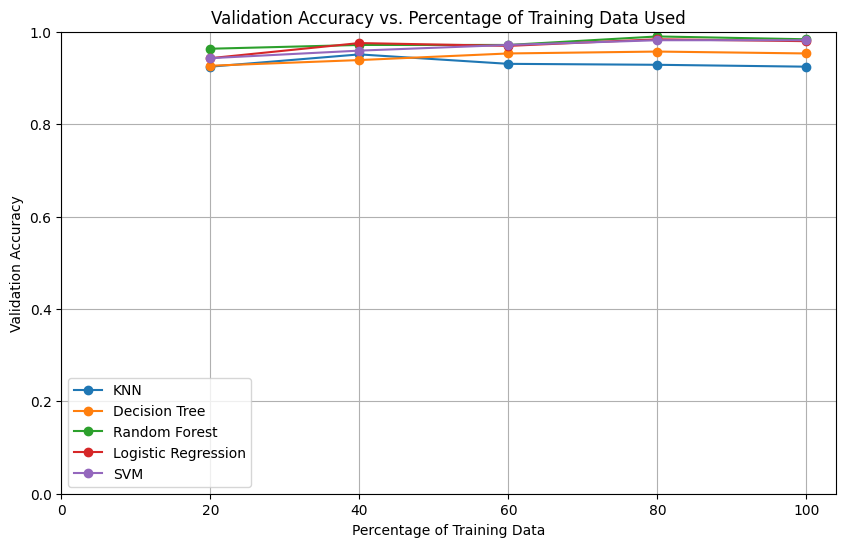

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the datasets
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
valid_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
test_emoticon_df = pd.read_csv("datasets/test/test_emoticon.csv")

train_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_seq_df = pd.read_csv("datasets/valid/valid_text_seq.csv")
test_seq_df = pd.read_csv("datasets/test/test_text_seq.csv")

train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
valid_feat = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
test_feat = np.load("datasets/test/test_feature.npz", allow_pickle=True)

# Prepare data for emoticons
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()
test_emoticon_X = test_emoticon_df['input_emoticon'].tolist()

# Prepare data for text sequences
train_seq_X = train_seq_df['input_str'].tolist()
valid_seq_X = valid_seq_df['input_str'].tolist()
test_seq_X = test_seq_df['input_str'].tolist()

# Prepare data for deep features
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']
test_feat_X = test_feat['features']

# Label encoding (for labels consistency)
le = LabelEncoder()
train_emoticon_Y_encoded = le.fit_transform(train_emoticon_Y)
valid_emoticon_Y_encoded = le.transform(valid_emoticon_Y)

# Step 1: Process emoticons (character-level tokenization and padding)
tokenizer_emoticon = Tokenizer(char_level=True)
tokenizer_emoticon.fit_on_texts(train_emoticon_X)

train_emoticon_seq = tokenizer_emoticon.texts_to_sequences(train_emoticon_X)
valid_emoticon_seq = tokenizer_emoticon.texts_to_sequences(valid_emoticon_X)
test_emoticon_seq = tokenizer_emoticon.texts_to_sequences(test_emoticon_X)

max_len_emoticon = max(len(seq) for seq in train_emoticon_seq)

train_emoticon_padded = pad_sequences(train_emoticon_seq, maxlen=max_len_emoticon, padding='post')
valid_emoticon_padded = pad_sequences(valid_emoticon_seq, maxlen=max_len_emoticon, padding='post')
test_emoticon_padded = pad_sequences(test_emoticon_seq, maxlen=max_len_emoticon, padding='post')

# Step 2: Process text sequences (word-level tokenization and padding)
tokenizer_seq = Tokenizer()
tokenizer_seq.fit_on_texts(train_seq_X)

train_seq_seq = tokenizer_seq.texts_to_sequences(train_seq_X)
valid_seq_seq = tokenizer_seq.texts_to_sequences(valid_seq_X)
test_seq_seq = tokenizer_seq.texts_to_sequences(test_seq_X)

max_len_seq = max(len(seq) for seq in train_seq_seq)

train_seq_padded = pad_sequences(train_seq_seq, maxlen=max_len_seq, padding='post')
valid_seq_padded = pad_sequences(valid_seq_seq, maxlen=max_len_seq, padding='post')
test_seq_padded = pad_sequences(test_seq_seq, maxlen=max_len_seq, padding='post')

# Step 3: Flatten deep features (reshape 3D arrays to 2D)
train_feat_X_flat = train_feat_X.reshape(train_feat_X.shape[0], -1)
valid_feat_X_flat = valid_feat_X.reshape(valid_feat_X.shape[0], -1)
test_feat_X_flat = test_feat_X.reshape(test_feat_X.shape[0], -1)

# Step 4: Combine the features
train_combined_X = np.hstack([train_feat_X_flat, train_seq_padded, train_emoticon_padded])
valid_combined_X = np.hstack([valid_feat_X_flat, valid_seq_padded, valid_emoticon_padded])
test_combined_X = np.hstack([test_feat_X_flat, test_seq_padded, test_emoticon_padded])

# Step 5: Scale the features
scaler = StandardScaler()
train_combined_X = scaler.fit_transform(train_combined_X)
valid_combined_X = scaler.transform(valid_combined_X)
test_combined_X = scaler.transform(test_combined_X)

# Step 6: Train classifiers on the combined features
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
results = {}

# Classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=5000),  # Increased max_iter
    "SVM": SVC(kernel='linear', max_iter=5000)  # Increased max_iter
}

# Function to train and evaluate classifiers
def train_and_evaluate(classifier, X_train, Y_train, X_val, Y_val, percentages):
    accuracies = []
    for p in percentages:
        if p < 1.0:
            # Split dataset based on percentage
            X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=p, random_state=42)
        else:
            X_train_subset = X_train
            Y_train_subset = Y_train

        # Train classifier
        classifier.fit(X_train_subset, Y_train_subset)

        # Predict and calculate accuracy
        Y_pred = classifier.predict(X_val)
        accuracy = accuracy_score(Y_val, Y_pred)
        accuracies.append(accuracy)

        print(f"Training with {int(p * 100)}% of the data, Validation Accuracy: {accuracy:.4f}")

    return accuracies

# Evaluate each classifier
best_model = None
best_accuracy = 0

for model_name, classifier in classifiers.items():
    print(f"Training model: {model_name}")
    accuracies = train_and_evaluate(classifier, train_combined_X, train_emoticon_Y_encoded,
                                    valid_combined_X, valid_emoticon_Y_encoded, percentages)
    results[model_name] = accuracies

    # Determine the best model based on validation accuracy
    final_accuracy = accuracies[-1]
    if final_accuracy > best_accuracy:
        best_accuracy = final_accuracy
        best_model = model_name

# Display the best model
print(f"Best Model: {best_model} with Validation Accuracy: {best_accuracy:.4f}")

# Step 7: Make predictions on the test data
best_classifier = classifiers[best_model]
test_predictions = best_classifier.predict(test_combined_X)

# Map predictions back to labels
predicted_labels = le.inverse_transform(test_predictions)

# Save predictions to a text file
output_df = pd.DataFrame({
    'predicted_label': predicted_labels
})
output_df.to_csv("pred_combined.txt", sep='\t', index=False, header=False)

# Step 8: Plotting accuracy vs. percentage of training data used
plt.figure(figsize=(10, 6))
for model_name, accuracies in results.items():
    plt.plot([p * 100 for p in percentages], accuracies, label=model_name, marker='o')

plt.title("Validation Accuracy vs. Percentage of Training Data Used")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)
plt.xticks(np.arange(0, 101, 20))
plt.legend()
plt.grid(True)
plt.show()